In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import sklearn.linear_model as sk
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [143]:
df=pd.read_csv('heart.csv')

In [144]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
df.shape

(303, 14)

In [146]:
print("Highest allowed",df['thalach'].mean() + 3*df['thalach'].std())
print("Lowest allowed",df['thalach'].mean() - 3*df['thalach'].std())

Highest allowed 218.36234803121096
Lowest allowed 80.93138134172638


In [147]:
df[(df['thalach']>218.36) | (df['thalach']<80.93)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [148]:
new=df[(df['thalach']<218.36) & (df['thalach']>80.93)]
new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [149]:
upper_limit=df['thalach'].mean() + 3*df['thalach'].std()
lower_limit=df['thalach'].mean() - 3*df['thalach'].std()

In [150]:
df['thalach'] = np.where(
    df['thalach']>upper_limit,
    upper_limit,
    np.where(
        df['thalach']<lower_limit,
        lower_limit,
        df['thalach']
    )
)

In [151]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.679642,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.799107,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,80.931381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [153]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

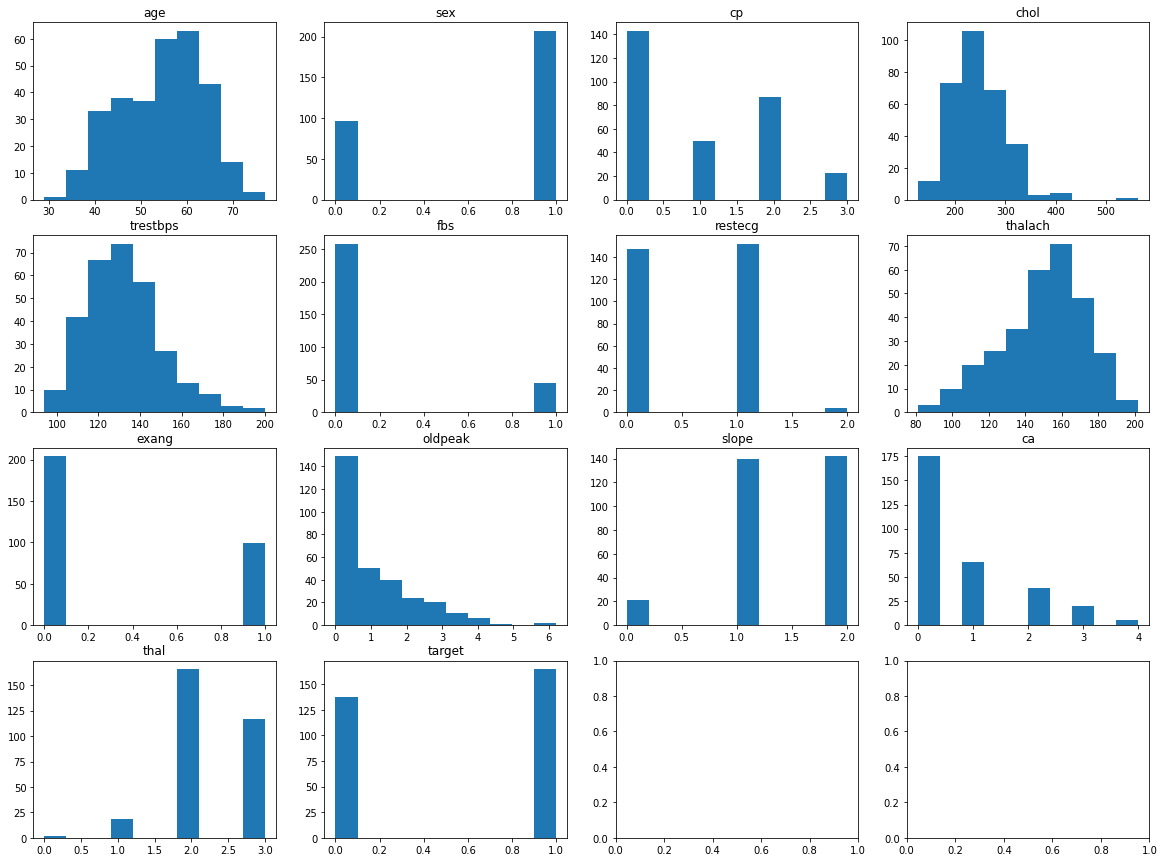

In [154]:
num_columns = ['age','sex','cp','chol','trestbps','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

fig, axs = plt.subplots(4,4, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 4
    trace_y = counter % 4
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [155]:
x=df.drop(columns=['target'],axis=1)
y=df['target']

In [156]:
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0    150.0      0      2.3   
1     37    1   2       130   250    0        1    187.0      0      3.5   
2     41    0   1       130   204    0        0    172.0      0      1.4   
3     56    1   1       120   236    0        1    178.0      0      0.8   
4     57    0   0       120   354    0        1    163.0      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1    123.0      1      0.2   
299   45    1   3       110   264    0        1    132.0      0      1.2   
300   68    1   0       144   193    1        1    141.0      0      3.4   
301   57    1   0       130   131    0        1    115.0      1      1.2   
302   57    0   1       130   236    0        0    174.0      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [158]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [161]:
logreg = sk.LogisticRegressionCV()
logreg.fit(x_train,y_train)

C:\python 39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python 39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

LogisticRegressionCV()

In [162]:
x_train_prediction=logreg.predict(x_train)

In [163]:
print(x_train_prediction)

[0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0]


In [165]:
from sklearn.metrics import accuracy_score 
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [166]:
print(training_data_accuracy)

0.8388429752066116


In [167]:
x_test_prediction=logreg.predict(x_test)

In [168]:
print(x_test_prediction)

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1]


In [169]:
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [170]:
print(test_data_accuracy)

0.9016393442622951
